In [1]:
import shutil, os
import time
import json
import numpy as np
import PIL
import matplotlib.pyplot as plt

def corr(lex_ct, vit_ct):
    lex, vit = np.array(lex_ct), np.array(vit_ct)
    norm = np.linalg.norm(lex) * np.linalg.norm(vit)
    return np.dot(lex, vit) / norm

def disjoint_ct(lex_ct, vit_ct):
    lex, vit = np.array(lex_ct), np.array(vit_ct)
    lex = lex == 1
    vit = vit > 0.94
    return np.bitwise_xor(lex, vit).sum()

def false_positive(lex_ct, vit_ct):
    """
    Accepted by vit rejected by lex
    """
    lex, vit = np.array(lex_ct), np.array(vit_ct)
    not_lex = lex == 0
    vit = vit > 0.94
    return np.bitwise_and(not_lex, vit).sum()

def false_negative(lex_ct, vit_ct):
    """
    Accepted by lex rejected by vit
    """
    lex, vit = np.array(lex_ct), np.array(vit_ct)
    lex = lex == 1
    not_vit = vit < 0.94
    return np.bitwise_and(lex, not_vit).sum()

100


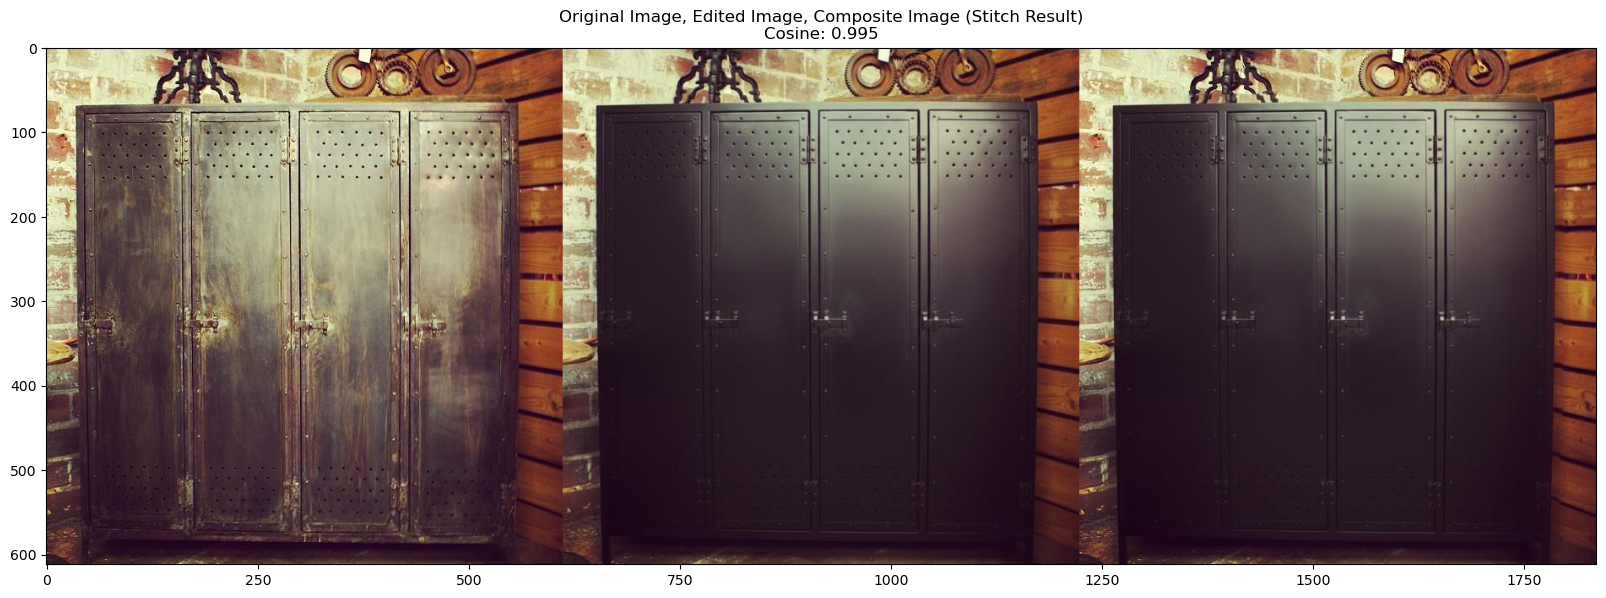

<Figure size 1000x600 with 0 Axes>

Prompt: Transform the distressed, dark metal locker cabinet into a sleek, matte black powder-coated finish, ensuring the industrial texture, rivets, and perforated details are preserved with realistic lighting and subtle reflections that integrate seamlessly into the original brick wall and wooden panel background.
Base: original
Similarity Score: 0.9948717355728149
Stitched sleek matte black powder-coated metal locker cabinet with multiple doors from other
Cut distressed dark metal locker cabinet with multiple doors from original
1000


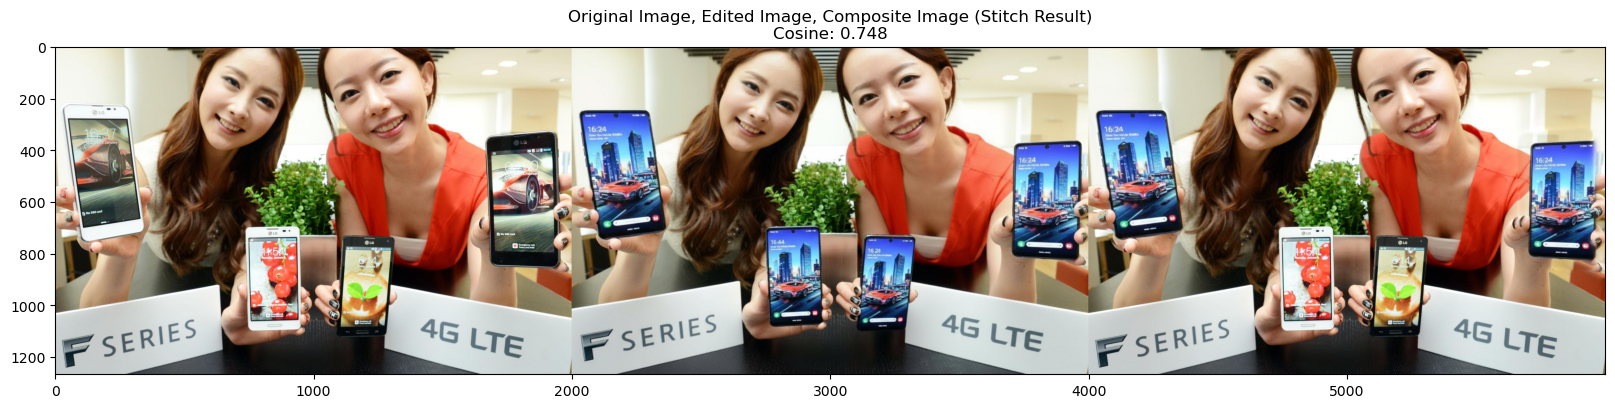

<Figure size 1000x600 with 0 Axes>

Prompt: Realistically replace all four LG smartphones, including those held by the women and those resting on the table, with sleek, modern Samsung Galaxy S24 Ultra phones in a titanium gray finish, ensuring they are held naturally with bright, high-resolution screens displaying vibrant, futuristic cityscape wallpapers, and maintaining perfect consistency with the original image's lighting, reflections, and perspective.
Base: original
Similarity Score: 0.7477681040763855
Stitched black Samsung Galaxy S24 Ultra smartphone held in the left hand of the woman on the left showing a cityscape wallpaper, black Samsung Galaxy S24 Ultra smartphone resting on the table in front of the woman on the left showing a cityscape wallpaper, black Samsung Galaxy S24 Ultra smartphone resting on the table in front of the woman on the right showing a cityscape wallpaper, black Samsung Galaxy S24 Ultra smartphone held in the right hand of the woman on the right showing a cityscape wallpaper from other
Cut wh

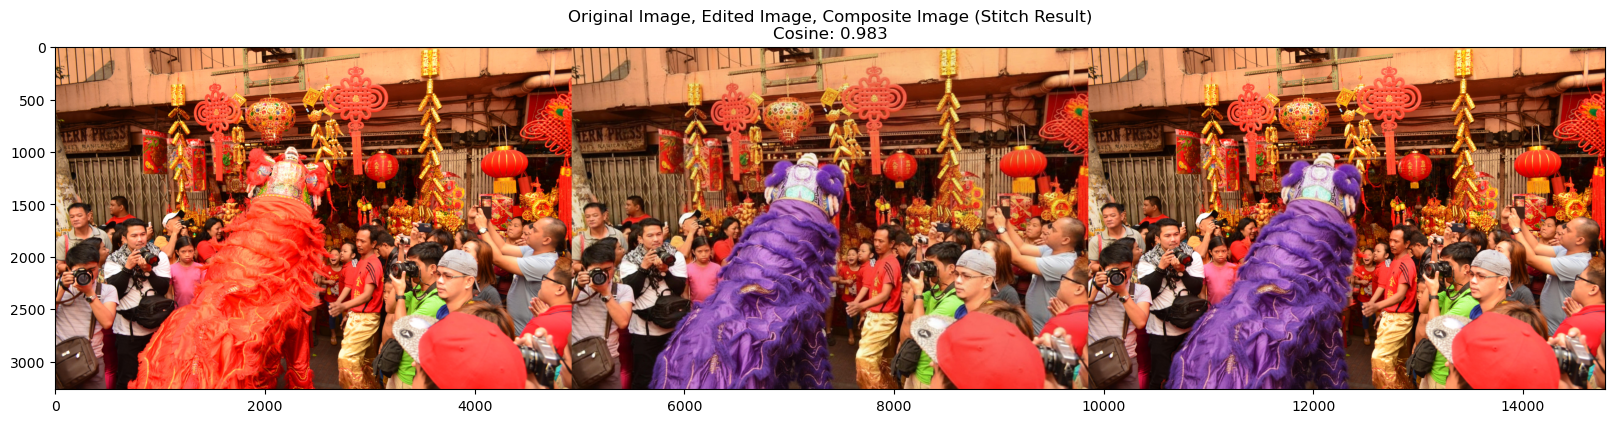

<Figure size 1000x600 with 0 Axes>

Prompt: Change the vibrant red lion dance costume to a rich, deep purple, ensuring the new color realistically interacts with the existing ambient lighting and shadows, and maintains the intricate texture and flow of its fabric, while keeping the surrounding festive decorations and crowd unchanged.
Base: original
Similarity Score: 0.9825795292854309
Stitched rich deep purple lion dance costume from other
Cut vibrant red lion dance costume from original
Lex Pass Rate: 0.5
ViT Pass Rate: 0.5
Disjoint: 0
ViT False Positive Rate: 0
ViT False Negative Rate: 0
Correlation: 0.7993769670732747
1002


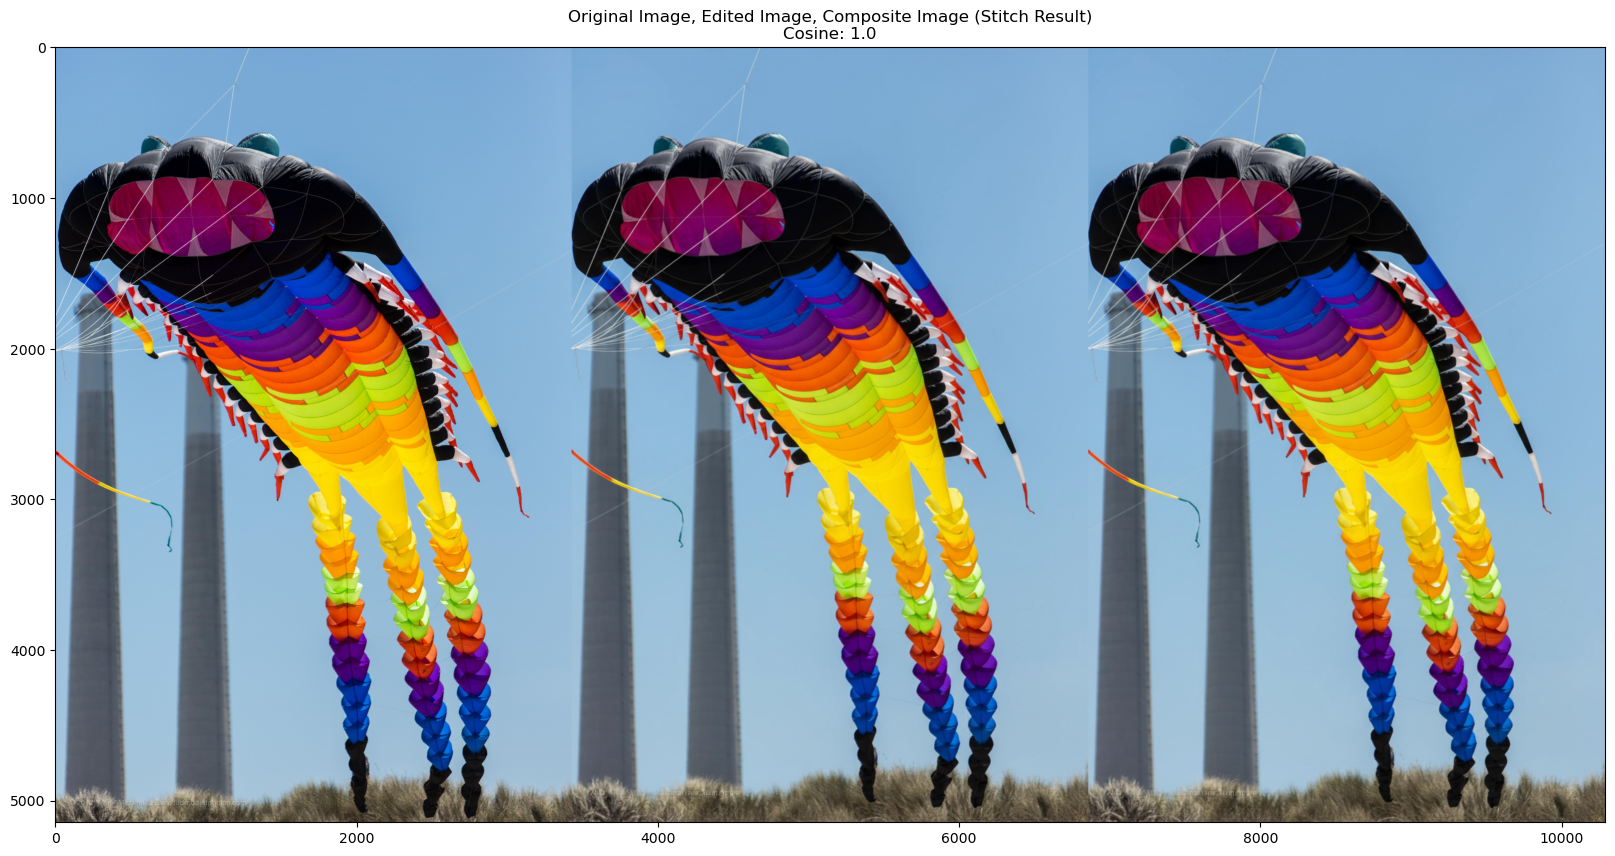

<Figure size 1000x600 with 0 Axes>

Prompt: Crop the image to zoom in on the colorful, multi-legged kite, centering its head and upper body while maintaining its full vertical presence in the frame, ensuring the vibrant rainbow segments and intricate details of its fabric are sharply focused against the clear blue sky, with the background structures subtly visible but not distracting.
Base: edited
Similarity Score: 0.9999998807907104
Lex Pass Rate: 0.667
ViT Pass Rate: 0.667
Disjoint: 0
ViT False Positive Rate: 0
ViT False Negative Rate: 0
Correlation: 0.8818089839556997


In [ ]:
n = 0
lex_ct = []
vit_ct = []

folder = r"C:\Users\lex\Documents\Ai2\data_bucket\data_sample\success"
good_bucket = r"C:\Users\lex\Documents\Ai2\src\data_collection\good_bucket"
bad_bucket = r"C:\Users\lex\Documents\Ai2\src\data_collection\bad_bucket"

for file in os.listdir(folder):
    plt.figure(figsize=(20, 12))
    try:
        base = np.array(PIL.Image.open(folder+'/'+file+'/base.jpeg'))
        comp = np.array(PIL.Image.open(folder+'/'+file+'/composite.jpeg'))
        other = np.array(PIL.Image.open(folder+'/'+file+'/other.jpeg'))
        meta = json.load(open(folder+'/'+file+'/meta.json'))
        print(file)
        stitch = np.concatenate([other, base, comp] if meta['base'] =='edited' else [base, other, comp], axis=1)
        plt.imshow(stitch)
        plt.title(f"Original Image, Edited Image, Composite Image (Stitch Result)\nCosine: {meta['similarity_score']:.3}")
        plt.figure(figsize=(10, 6))
        plt.show()
        print("Prompt:", meta['prompt'])
        print("Base:", meta['base'])
        print("Similarity Score:", meta['similarity_score'])
        if len(meta['union']['success']) > 0:
            print(f"Stitched {', '.join(meta['union']['success'])} from other")
        if len(meta['union']['failed']) > 0:
            print(f"Failed to find {', '.join(meta['union']['failed'])} in other")
        if len(meta['subtraction']['success']) > 0:
            print(f"Cut {', '.join(meta['subtraction']['success'])} from {meta['base']}")
        if len(meta['subtraction']['failed']) > 0:
            print(f"Failed to cut {', '.join(meta['subtraction']['failed'])} from {meta['base']}")

        if n > 0:
            print(f"Lex Pass Rate: {sum(lex_ct)/n:.3}")
            print(f"ViT Pass Rate: {(np.array(vit_ct) > 0.94).sum()/n:.3}")
            print(f"Disjoint: {disjoint_ct(lex_ct, vit_ct)}")
            print(f"ViT False Positive Rate: {false_positive(lex_ct, vit_ct)}")
            print(f"ViT False Negative Rate: {false_negative(lex_ct, vit_ct)}")
            print(f"Correlation: {corr(lex_ct, vit_ct)}")

        time.sleep(1)
        vit_ct.append(meta['similarity_score'])
        nothing_happened = len(meta['subtraction']['failed']) == 0 and len(meta['subtraction']['success']) == 0 and len(meta['union']['failed']) == 0 and len(meta['union']['success']) == 0
        
        if nothing_happened:
            lex_ct.append(1)
            PIL.Image.fromarray(stitch).save(good_bucket+r"/"+file+".jpeg")

        inp = input()

        if inp == '':
            # Good
            lex_ct.append(1)
            PIL.Image.fromarray(stitch).save(good_bucket+r"/"+file+".jpeg")
        elif inp == 'exit':
            break
        else:
            # Bad
            lex_ct.append(0)
            PIL.Image.fromarray(stitch).save(bad_bucket+r"/"+file+".jpeg")
        n += 1

    except Exception as e:
        print(e)
        continue

print(f"n: {n}")
print(f"Lex Pass Rate: {sum(lex_ct)/n:.3}")
print(f"ViT Pass Rate: {(np.array(vit_ct) > 0.94).sum()/n:.3}")
print(f"Disjoint: {disjoint_ct(lex_ct, vit_ct) / n:.3}")
print(f"ViT False Positive Rate: {false_positive(lex_ct, vit_ct)/n:.3}")
print(f"ViT False Negative Rate: {false_negative(lex_ct, vit_ct)/n:.3}")
print(f"Correlation: {corr(lex_ct, vit_ct):.3}")